In [5]:
import math
import random
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Simple Monte Carlo integration to integrate ln(x)/x between 2.5 and 10.

def function(x,constant):
    return constant*(np.log(x)/x)

def SMC_integrate(iterations, lower_x, upper_x,lower_y, upper_y,constant):
    count = 0.0
    in_area = 0.0
    while count <iterations :
        x = random.uniform(lower_x, upper_x)
        y = random.uniform(lower_y, upper_y)
        if y < function(x,constant):
            in_area += 1
        count += 1
    area_box = (upper_x-lower_x)*(upper_y-lower_y) 
    answer=(in_area/count)*area_box
    error=1/(np.sqrt(iterations))
    return answer, error

def rect(x,y,w,h,c):
    ax = plt.gca()
    polygon = plt.Rectangle((x,y),w,h,color=c)
    ax.add_patch(polygon)

def color_fill(X,Y,inputcolor):
    plt.plot(X,Y,lw=0)  # Plot so the axes scale correctly
    dx = X[1]-X[0]
    N  = float(X.size)
    for n, (x,y) in enumerate(zip(X,Y)):
        color = inputcolor 
        rect(x,0,dx,y,color)

def curve_fitter(constant,definite_integral,error,l_x,u_x):
    x_generated=np.linspace(1,20,1000)
    y_generated=function(x_generated,constant)
    parameters, covariance=curve_fit(
        f=function, 
        xdata=x_generated, 
        ydata=y_generated, 
        p0=[1],  
        bounds=(-np.inf, np.inf))
    std = np.sqrt(np.diag(covariance))
    res = y_generated - function(x_generated, *parameters)
    plt.plot(
        x_generated, 
        function(
            x_generated, 
            *parameters), 
        linestyle='-', 
        linewidth=2, 
        color='#f2a154')
    color_fill(x_generated,y_generated,'#f7f6e7')
    x_area=np.linspace(l_x,u_x,1000)
    y_area=function(x_area,constant)
    color_fill(x_area,y_area,'#e7e6e1')
    plt.vlines(
        x = 2.5, 
        ymin = 0, 
        ymax = y_area[0], 
        colors = '#314e52', 
        label = 'vline_multiple - full height') 
    plt.vlines(
        x = 10, 
        ymin = 0, 
        ymax = y_area[-1], 
        colors = '#314e52', 
        label = 'vline_multiple - full height') 
    plt.title('f(x)=ln(x)/x')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.text(7.5,0.30,'Area of shaded region: {} +/- {}'.format(round(definite_integral,3),round(error,3)))
    plt.show()
    return parameters,covariance

def main():
    constant=1
    it=100000
    l_x = 2.5
    u_x = 10
    l_y = 0
    u_y = 1/math.e
    definite_integral,error=SMC_integrate(it,l_x,u_x,l_y,u_y,constant)
    parameters,covariance=curve_fitter(constant,definite_integral,error,l_x,u_x)

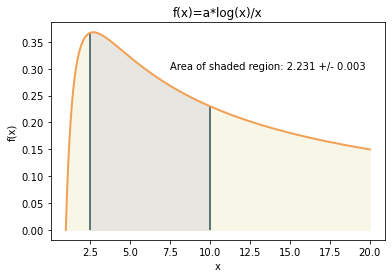

In [6]:
main()